In [1]:
%matplotlib inline
import autograd.numpy as np
import sys
sys.path.append('/Users/Cybele/GIT/birkhoff/src/')
import categorical as cat
import autograd.numpy.random as npr
from autograd import grad, jacobian
from autograd.optimizers import adam
from scipy.misc import logsumexp
from scipy.special import gammaln
from scipy.linalg import norm
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
seaborn.set_context("talk")
import cPickle


In [2]:
#dictionary=cPickle.load( open( "../save4.p", "rb" ) )
dictionary=cPickle.load( open( "../save_k10.p", "rb" ) )
print 5

for e in dictionary:
    print e

x_true_all = dictionary['x_true_all']
mu_gmm_all = dictionary['mu_gmm_all']
z_true_all = dictionary['z_true_all']
posteriors = dictionary['posteriors']
log_evidences = dictionary['log_evidences']

5
posteriors
elbos
approx_z
log_evidences
var_params
x_true_all
dists
z_true_all
mu_gmm_all


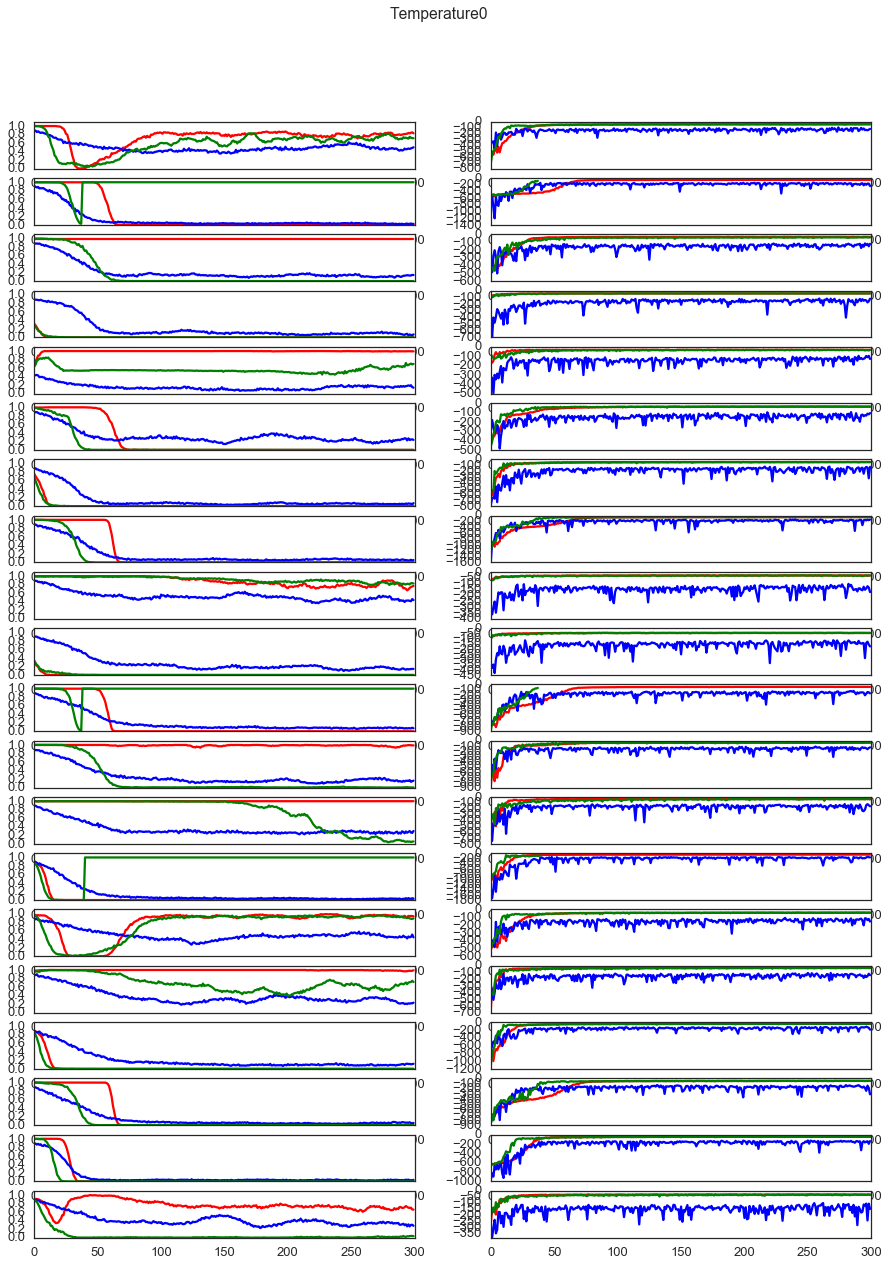

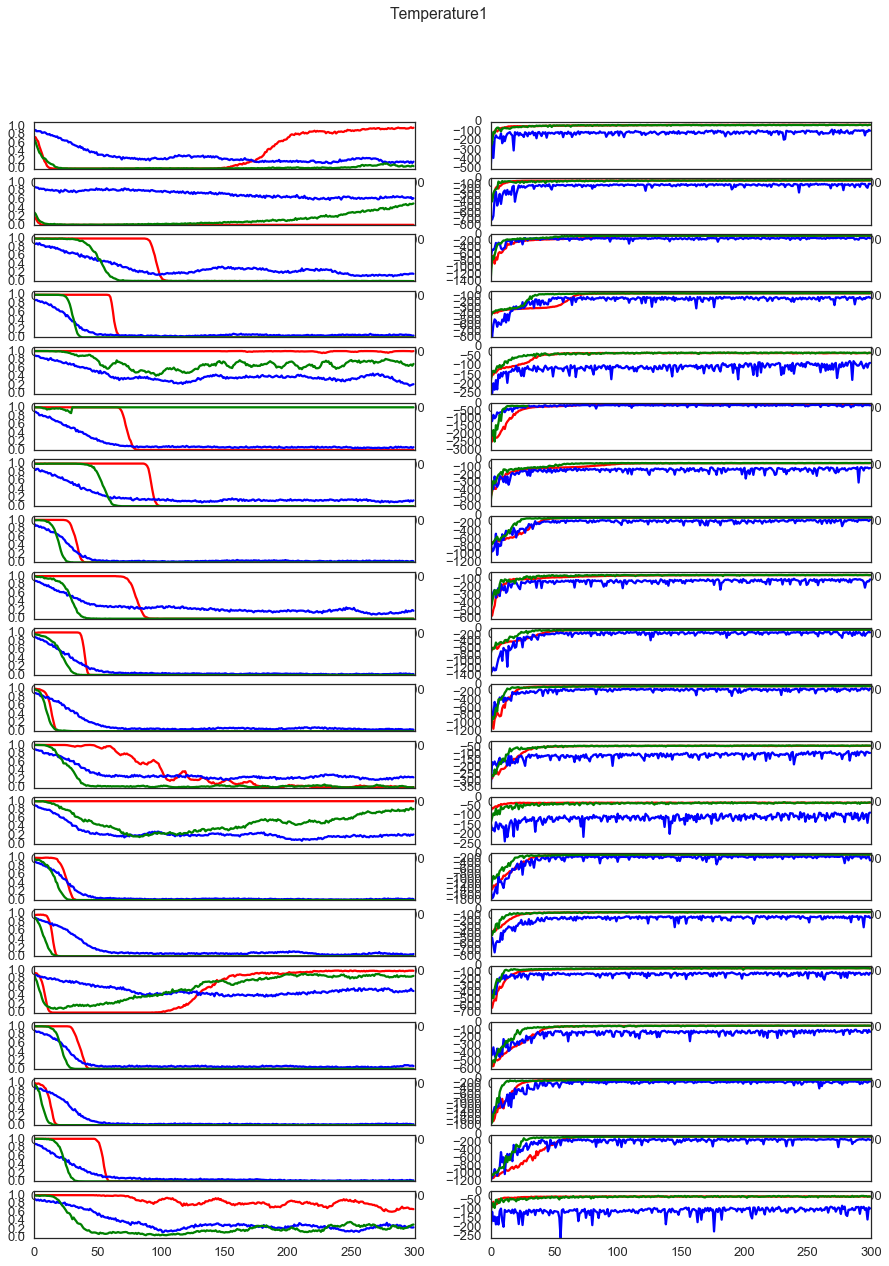

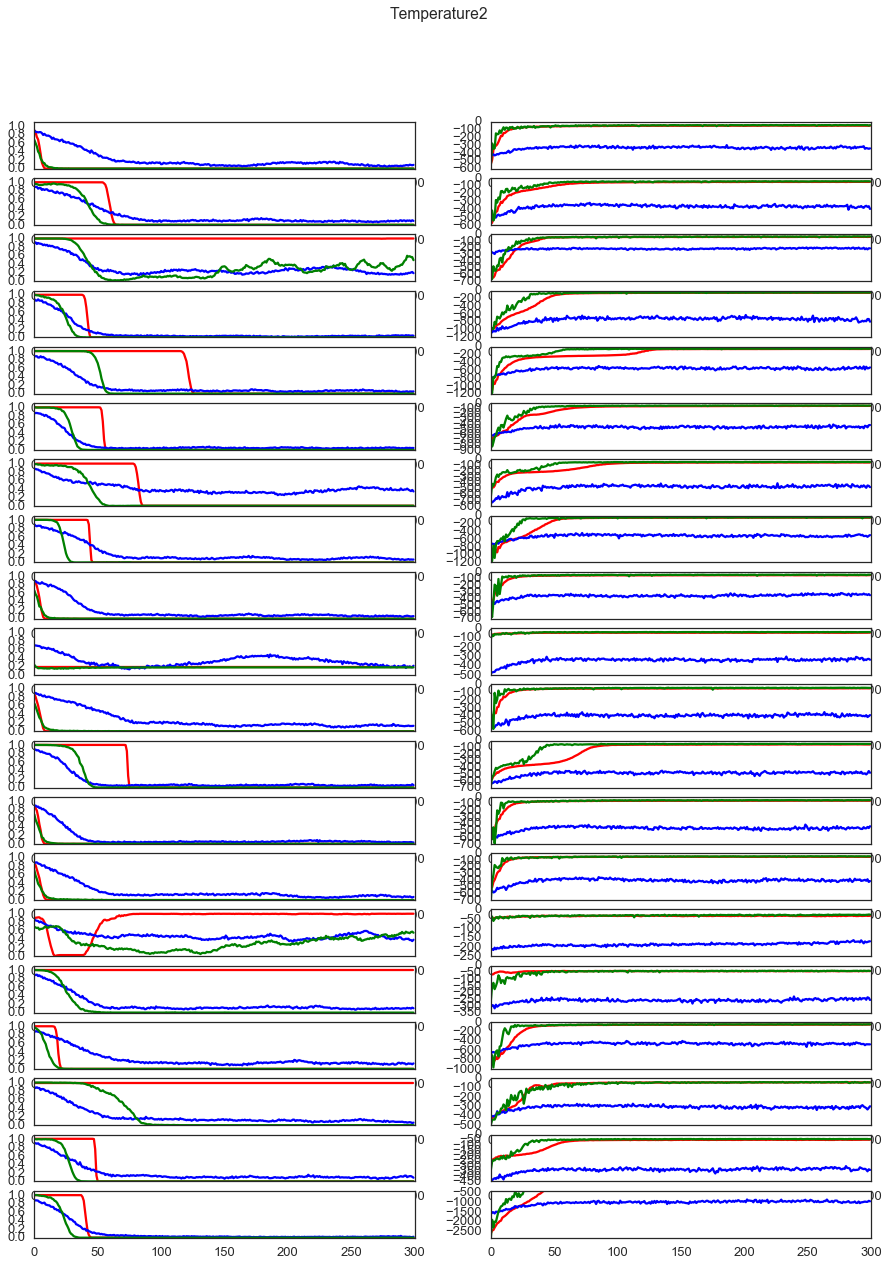

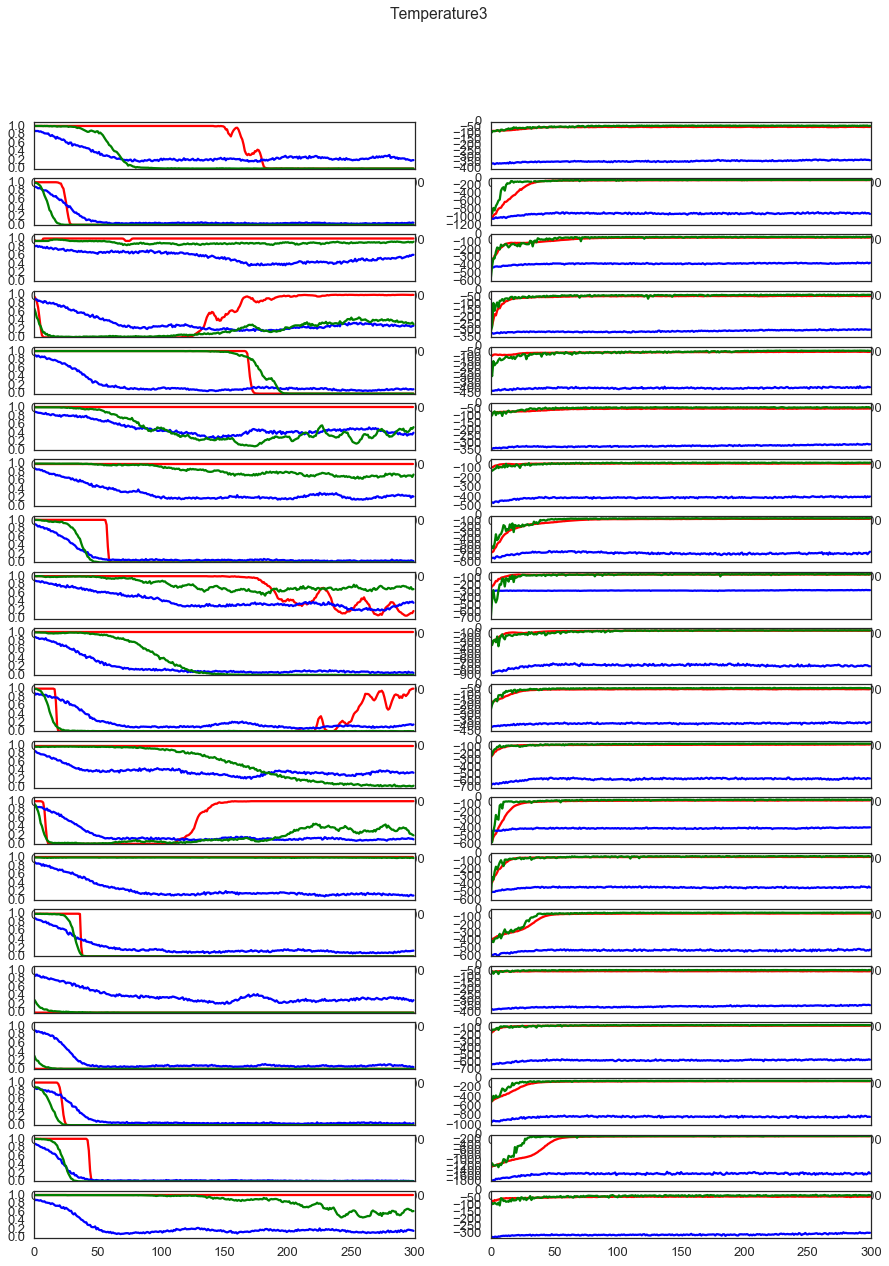

In [3]:
for k in range(4):
    f, ax = plt.subplots(20, 2, sharey=False, figsize=(15, 20))
    #print (maxi,dictionary['log_evidences'][l,k])
    for l in range(20):
        
        ax[l,1].plot(dictionary['elbos'][0][l,k,:].T,'r')
        ax[l,1].plot(dictionary['elbos'][1][l,k,:].T,'b')
        ax[l,1].plot(dictionary['elbos'][2][l,k,:].T,'g')
        mini=min([np.amin(dictionary['elbos'][h][l,k,:]) for h in range(3)])
        maxi =max([np.amax(dictionary['elbos'][h][l,k,:]) for h in range(3)])
        axes = plt.gca()
    
        axes.set_ylim([mini,dictionary['log_evidences'][l,k]])
        ax[l,0].plot(dictionary['dists'][0][l,k,:].T,'r')
        ax[l,0].plot(dictionary['dists'][1][l,k,:].T,'b')
        ax[l,0].plot(dictionary['dists'][2][l,k,:].T,'g')
        ax[l,0].set_ylim([0,1.1])
        f.suptitle('Temperature' + str(k))

In [6]:
x_true_all = dictionary['x_true_all']
mu_gmm_all = dictionary['mu_gmm_all']
z_true_all = dictionary['z_true_all']
posteriors = dictionary['posteriors']
log_evidences = dictionary['log_evidences']


In [5]:
var_params0=varseq[67,:]
print var_params0

NameError: name 'varseq' is not defined

In [7]:
temp_ind = 0
iter_ind = 2
method_ind = 0
N_samples=10
x_true = x_true_all[iter_ind,temp_ind].T
z_true =z_true_all[iter_ind,temp_ind]
log_evidence=log_evidences[iter_ind,temp_ind]
posterior = posteriors[iter_ind,temp_ind]
mu_gmm = mu_gmm_all[iter_ind,temp_ind]
sigma = 0.05
epsilon = 1e-9
K=10
N=1
indtypes = [0]
temps = np.array([0.5, 1, 5, 10, 100, 1./1]) #temperatures
N_temps = len(temps) #Number of temperatures
N_iters = 100# Stochastic gradient ascent of the ELBO


sigma_gmm = 0.05
alpha_gmm = np.ones(K)/K
model_params = (mu_gmm, sigma_gmm, alpha_gmm)

pi0 = np.zeros((N,K))
pi0[0,7]=0.8
pi0[0,[x for x in range(10) if x not in [7]]]=0.2/9

np.ones(K)/K
#mu = np.reshape(cat.logit(cat.pi_to_psi(np.array(pi0[0]))),(1,-1))
mu = np.zeros((N,K-1))
mu = np.reshape(cat.logit(cat.pi_to_psi(np.ones(K)/K)),(N,-1))
print mu
logsigma = 0*np.ones((N,K-1))
var_params_gaussian = cat.pack_gaussian_params(mu,logsigma)
#var_params_gaussian = var_params0
#set recognition model (initial) params: Gumbell case

loga = np.zeros((N,K))
log_temp = -3*np.ones(1)

var_params_gumbell = cat.pack_gumbell_params(loga,log_temp)
#print var_params_gumbell[len(var_params_gumbell)-1]
(loga2, log_temp2) = cat.unpack_gumbell_params(var_params_gumbell, 1)
#print N_samples
#print np.tile(loga2, (N_samples)).shape
#print np.reshape(log_temp2,1).shape
#(loga,log_temp2)=cat.unpack_gumbell_params(var_params_gumbell,1)
#print np.concatenate(loga.flatten(),log_temp)
#print np.tile(loga,(2)).shape
#print np.tile(loga, (N_samples)).shape
#print cat.pack_gumbell_params(np.tile(loga, ( N_samples)),1)

loga = np.zeros((N,K-1))
logb = np.zeros((N,K-1))

var_params_kumaraswamy = cat.pack_kumaraswamy_params(loga,logb)
temp_prior = 1
new_temp_ind = 5
elbo_gaussian = lambda x,t: -1*cat.elbo_gmm_gaussian(x_true,x,model_params,temp_prior,N_samples,epsilon)
elbo_gumbell = lambda x, t: -1 * cat.elbo_gmm_gumbell(x_true, x, model_params,temp_prior,N_samples)
elbo_kumaraswamy = lambda x, t: -1 * cat.elbo_gmm_kumaraswamy(x_true, x, model_params, temp_prior,N_samples)
elbo_gumbell2 = lambda x, t: -1 * cat.elbo_gmm_gumbell_2( x)

functions =[elbo_gaussian,elbo_gumbell,elbo_kumaraswamy,elbo_gumbell2]
functions_sample = [cat.sample_pi_gaussian,cat.sample_pi_gumbell,cat.sample_pi_kumaraswamy]
elbos = [cat.elbo_gmm_gaussian,cat.elbo_gmm_gumbell,cat.elbo_gmm_kumaraswamy]
var_params = [var_params_gaussian,var_params_gumbell,var_params_kumaraswamy,var_params_gumbell]
types = ['Gaussian','Gumbell','Kumaraswamy']
#print var_params[0].shape
#print var_params[1].shape
# l=1
# i=0
var_params
print -1*functions[1](np.concatenate((np.ones(10),5*np.ones(1))),1)
print -1*functions[1](np.concatenate((-1*np.ones(10),0.3*np.ones(1))),1)
print -1*functions[1](np.concatenate((-1*np.ones(10),0.3*np.ones(1))),1)
print -1*functions[1](var_params[1],100)

#a= grad(functions[1])
#print var_params[1]
#print a(var_params[1],1)

# (loga, log_temp) = cat.unpack_gumbell_params(var_params[l],N)

[[ -2.19722458e+00  -2.07944154e+00  -1.94591015e+00  -1.79175947e+00
   -1.60943791e+00  -1.38629436e+00  -1.09861229e+00  -6.93147181e-01
   -4.44089210e-16]]
-159.36997921
-172.183355561
-129.789048471
-732.834803362


<Container object of 10 artists>

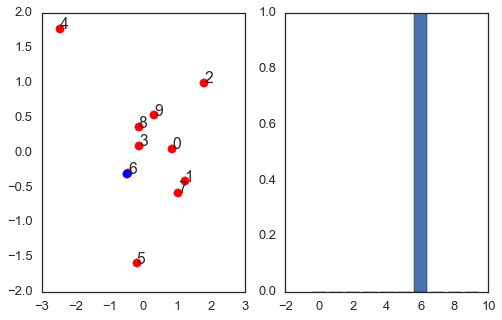

In [8]:
#plt.plot(elbo_iterations)
f, ax = plt.subplots(1, 2, sharey=False, figsize=(8, 5))
ax[0].scatter(mu_gmm[0],mu_gmm[1],color='red',s=70)
for t,i in enumerate(zip(mu_gmm[0],mu_gmm[1])):
    ax[0].annotate(str(t), xy=i, xytext=i)

ax[0].scatter(x_true[0][0],x_true[0][1],color='blue',s=70)
ax[1].bar(np.arange(10), posterior, align='center')
#print functions_sample[l](varseq[i][:len(varseq[i])-1], npr.uniform(0,1,(N,K)),temp = np.exp(varseq[i][-1]))

In [12]:
#Gradient ascent

N_samples_test=100
step_size = 0.1
N_iters = 1000
N_samples=5
elbo_iterations=np.zeros((len(indtypes),N_iters))
approx=np.zeros((len(indtypes),N_iters,K))
dist = np.zeros((len(indtypes),N_iters))

for j,l in enumerate(indtypes):
    #pi_samples = np.reshape(np.asarray([functions_sample[l](np.reshape(var_params[l],(1,-1)), npr.randn(N,K - 1), temp=temps[new_temp_ind])
     #                   for _ in range(N_samples_test)]),(N_samples_test,K))
    #one_hot=np.zeros((N_samples_test,K))
    #one_hot[range(N_samples_test),np.argmax(pi_samples,axis=1)]=1
    #print np.round(pi_samples*100)/100
    print 'Begining ' +types[l]  
    variational_params,varseq = adam(grad(functions[l]), var_params[l], step_size=step_size, num_iters=N_iters)
    
    for i in range(varseq.shape[0]):
        
       
        elbo_iterations[j,i] = elbos[l](x_true, varseq[i], model_params, temp_prior,N_samples,epsilon)
       
       
        if(l==0):
            pi_samples = np.reshape(np.asarray([functions_sample[l](np.reshape(varseq[i],(1,-1)), npr.randn(N,K - 1), 1,epsilon)
                            for _ in range(N_samples_test)]),(N_samples_test,K))
        if(l==1):        
            pi_samples = np.reshape(np.asarray([functions_sample[l](varseq[i][:len(varseq[i])-1], npr.uniform(0,1,(N,K)),1)
                            for _ in range(N_samples_test)]),(N_samples_test,K))
        if(l==2):
            pi_samples = np.reshape(np.asarray([functions_sample[l](np.reshape(varseq[i],(1,-1)), npr.uniform(0,1,(N,K - 1)), 1)
                               for _ in range(N_samples_test)]),(N_samples_test,K))

        
        one_hot=np.zeros((N_samples_test,K))
        one_hot[range(N_samples_test),np.argmax(pi_samples,axis=1)]=1
        #if i % 10 == 0:
         #   print pi_samples
        approx[j,i,:] = np.mean(one_hot,axis=0)
        dist[j,i]=max(abs(posterior-np.mean(one_hot,axis=0)))
    print types[l] + 'Done'
    print np.round(100*pi_samples)/100
    print 'caca'
    print np.mean(np.round(100*pi_samples)/100,axis=0)
    print approx[j,-1,:]

Begining Gaussian
(<autograd.core.FloatNode object at 0x13608ef50>, <autograd.core.FloatNode object at 0x13845e690>, <autograd.core.FloatNode object at 0x1381049d0>)
Iteration of ADAM n0
(<autograd.core.FloatNode object at 0x1379af850>, <autograd.core.FloatNode object at 0x1367fa0d0>, <autograd.core.FloatNode object at 0x1362a3c10>)
(<autograd.core.FloatNode object at 0x136275f10>, <autograd.core.FloatNode object at 0x136275b90>, <autograd.core.FloatNode object at 0x1362a3110>)
(<autograd.core.FloatNode object at 0x13814c750>, <autograd.core.FloatNode object at 0x1381e7c10>, <autograd.core.FloatNode object at 0x1311c3890>)
(<autograd.core.FloatNode object at 0x1379afdd0>, <autograd.core.FloatNode object at 0x1381286d0>, <autograd.core.FloatNode object at 0x137a71d90>)
(<autograd.core.FloatNode object at 0x13796e650>, <autograd.core.FloatNode object at 0x13796e9d0>, <autograd.core.FloatNode object at 0x137f5c210>)
(<autograd.core.FloatNode object at 0x137dce6d0>, <autograd.core.FloatNod

In [ ]:
print temps[new_temp_ind]
print type(temps[0])#print varseq[69]
for e in range(10):
    elbos[0](x_true, varseq[55], model_params, temp_prior,N_samples)
N_samples=5
#print np.concatenate((varseq, np.reshape(np.arange(50),(-1,1))),axis=1)

n=0

temp=1
#print np.log(a)
temp_prior = 0.0001
alpha = np.ones(K)*temp_prior/1000
print 
for i in range(10):
    epsilon=npr.randn(N_samples, N, K -1 )
    a= cat.sample_pi_gaussian(np.tile(varseq[80],(N_samples,1)),np.reshape(epsilon[:,n,:],(N_samples,K-1)), temp)
    a = np.maximum(a, 1e-30)
    a = (a.T / np.sum(a, axis=1)).T
    #print a
    #print np.log(a)
    #print(np.dot(np.log(a),alpha-1),-np.sum(gammaln(alpha)),gammaln(np.sum(alpha)))
    print (cat.local_log_probability_gmm(x_true[0], a, model_params),np.sum(cat.dirichlet_logpdf(a,np.ones(K)*temp_prior/100000)),
           - np.sum(cat.log_density_pi_gaussian(a, np.tile(varseq[80],(N_samples,1)), 1)))
   # assert b is not float('inf')
#for i in range(30):
#for i in range(30):
 #   print grad(functions[0])(varseq[77],1)

In [ ]:
plt.plot(dictionary['elbos'][1][iter_ind,3],'blue')
plt.plot(elbo_iterations[0],'red')
#plt.plot(elbo_iterations[1],'blue')
#plt.plot(elbo_iterations[2],'green')
plt.plot([0,N_iters],[log_evidence,log_evidence])
print elbo_iterations[0]
#print variational_params
#print functions_sample[1](varseq[0][:len(varseq[0])-1], npr.uniform(0,1,(N,K)),temp = np.exp(varseq[0][-1]))
#print varseq[200][:len(varseq[0])-1]
#print varseq[0]
varseq
print varseq[67]
pi_samples = np.reshape(np.asarray([functions_sample[l](np.reshape(varseq[90],(1,-1)), npr.randn(N,K - 1), 1)
                            for _ in range(N_samples_test)]),(N_samples_test,K))
#print x_true[0]
#print mu_gmm[:,7]
#print np.dot(pi_samples  ,mu_gmm.T) 
print pi_samples

In [ ]:
#plt.plot(dist[1],'blue')
plt.plot(dist[0],'red')
#plt.plot(dist[2],'green')
#plt.plot(dictionary['dists'][1][iter_ind,3,:],'green')
print dist[0][77]
print mu_gmm[:,1]*0.15+mu_gmm[:,2]*0.35+mu_gmm[:,9]*0.35
print x_true[0]

In [ ]:
print varseq[68]

In [ ]:
print variational_params

In [ ]:
print variational_params

In [ ]:
print varseq[100,:]

In [ ]:
print approx[0][0:100,:]

In [ ]:
print approx[0]